In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

Could not connect to 127.0.0.1: 29581
Traceback (most recent call last):
  File "C:\Program Files\JetBrains\PyCharm 2022.1.3\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_comm.py", line 463, in start_client
    s.connect((host, port))
ConnectionRefusedError: [WinError 10061] 由于目标计算机积极拒绝，无法连接。
Traceback (most recent call last):
  File "C:\Program Files\JetBrains\PyCharm 2022.1.3\plugins\python\helpers-pro\jupyter_debug\pydev_jupyter_utils.py", line 81, in attach_to_debugger
    debugger.connect(pydev_localhost.get_localhost(), debugger_port)
  File "C:\Program Files\JetBrains\PyCharm 2022.1.3\plugins\python\helpers\pydev\pydevd.py", line 660, in connect
    s = start_client(host, port)
  File "C:\Program Files\JetBrains\PyCharm 2022.1.3\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_comm.py", line 463, in start_client
    s.connect((host, port))
ConnectionRefusedError: [WinError 10061] 由于目标计算机积极拒绝，无法连接。
Failed to connect to target debugger.


In [2]:
xigua = pd.read_csv("../data/xigua3.0.csv", index_col='编号')
xigua

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
编号,,,,,,,,,
1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否


In [7]:
xigua_1_data = xigua[['密度', '含糖率']].values
xigua_1_target = xigua['好瓜'].replace({"是": 1, "否": 0}).values
print(xigua_1_target)

[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]


In [4]:
import sklearn.ensemble as ensemble
ensemble.__all__

['BaseEnsemble',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'IsolationForest',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'AdaBoostClassifier',
 'AdaBoostRegressor',
 'VotingClassifier',
 'VotingRegressor',
 'StackingClassifier',
 'StackingRegressor',
 'HistGradientBoostingClassifier',
 'HistGradientBoostingRegressor']

In [9]:
model = ensemble.AdaBoostClassifier()
model.fit(xigua_1_data, xigua_1_target)
model.score(xigua_1_data, xigua_1_target)

1.0

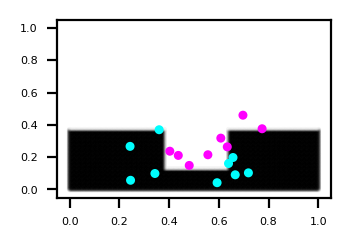

In [61]:
x = np.linspace(0, 1, 201)
y = np.linspace(0, 1, 201)
x, y = np.meshgrid(x, y)
disp_input = np.vstack((x.flatten(), y.flatten())).T

plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 4

def show_model(model, sub_i=1, title=""):
    disp_predict = model.predict(disp_input)
    xigua_1_predict = model.predict(xigua_1_data)

    # plt.figure(figsize=[10,20], dpi=200)
    plt.subplot(3, 3, sub_i)
    plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='gray', alpha=0.1, s=1)
    plt.scatter(xigua_1_data[:, 0], xigua_1_data[:, 1], c=xigua_1_predict, cmap='cool', s=5)
    plt.title(title)

show_model(model)
plt.show()

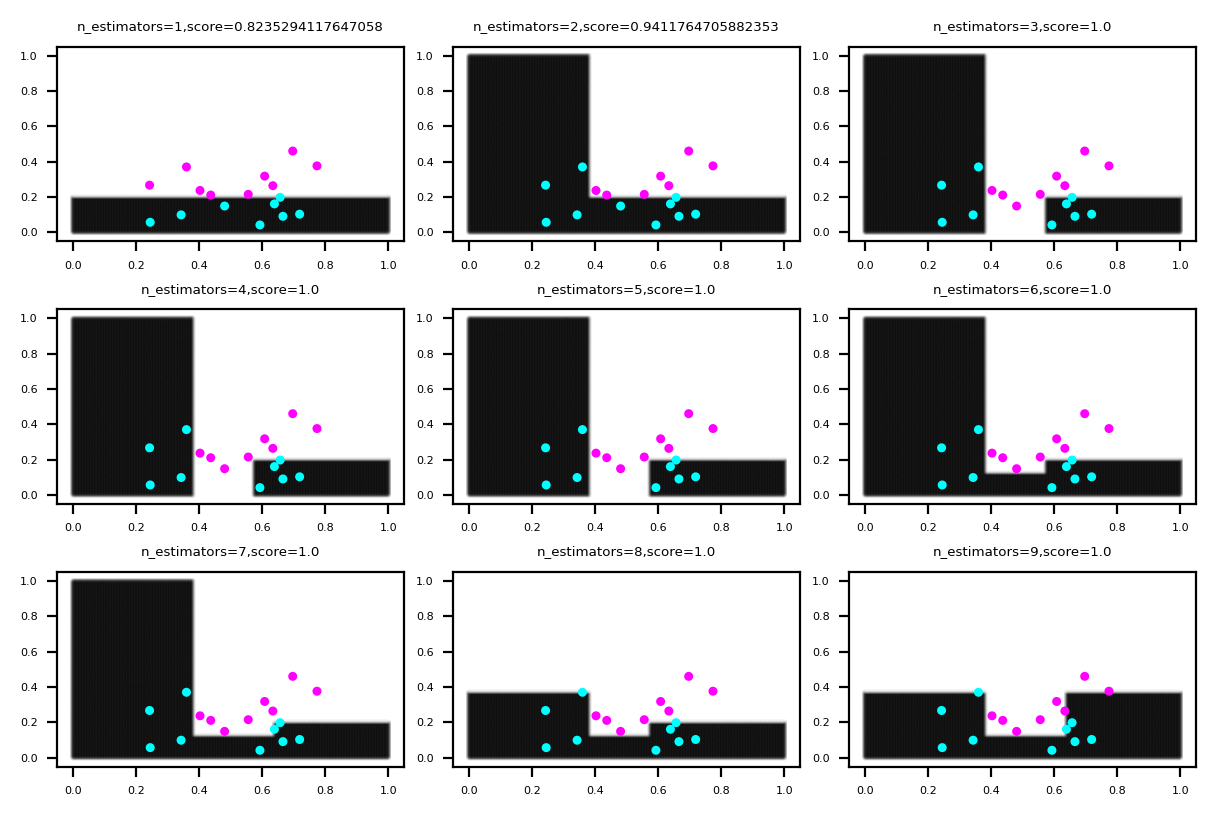

In [62]:
for i in range(1, 10):
    model = ensemble.AdaBoostClassifier(n_estimators=i)
    model.fit(xigua_1_data, xigua_1_target)
    title = "n_estimators={},score={}".format(i, model.score(xigua_1_data, xigua_1_target))
    show_model(model, i, title)
plt.tight_layout()
plt.show()

In [65]:
from sklearn.tree import DecisionTreeClassifier
for depth_i, i in zip([1, 3, 5, 7], range(1,100)):
    model = DecisionTreeClassifier(criterion='gini', max_depth=depth_i)
    model.fit(xigua_1_data, xigua_1_target)
    title = "max_depth={},score={}".format(depth_i, model.score(xigua_1_data, xigua_1_target))
    show_model(model, i, title)
plt.tight_layout()
plt.show()

ValueError: num must be 1 <= num <= 9, not 0

<Figure size 1200x800 with 0 Axes>